In [88]:
%matplotlib notebook
import numpy as np
import operator
import scipy
import math
import scipy.ndimage
import matplotlib.patches
from scipy.spatial import distance
import photutils
import itertools
from photutils import centroid_com
from scipy import ndimage
from scipy import optimize
from scipy.optimize import least_squares
import h5py
import matplotlib
import matplotlib.pyplot as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.ndimage import gaussian_filter
import cv2
from scipy.ndimage.morphology import binary_fill_holes
import os, re
import sys
import skimage
from skimage import morphology
sourcepath = '/Users/niloo/Desktop/SwissFel_2019/data_beamtime/SwissFEL_BERNINA_20181820-master/src'
sys.path.insert(0, sourcepath)
import calibrators
from calibrators import *
from matplotlib.colors import LogNorm
from adjustText import adjust_text

In [89]:
# for specific shot and run number read the information in the HDF files
'''DISTANCE SHOULD BE SAVED PER PEAK TO SET THE THRESHOLD FOR MINIMUM DISTANCE TO OTHER PEAKS 
   SO THAT WE GET ONE MIN_Q AND JUDGE THE DISTANCE TO OTHER PEAKS TO SEE IF THEY CAN BE SINGLE OR MULTIPLE PEAKS'''
def specific_shots(run, shot, path=None):
    '''
    open specific shots in a run and load its keys,
    '''
    peak_list = []
    center_mass = []
    radius = []
    q_cm = []
    min_distance = []
    distances = []
    h5path = '/Users/niloo/Desktop/LCLS/14Dec2020/LCLS_files/with_q/%s_type1-peaks_with_q.h5'%run
    h5file = h5py.File(h5path,'r')
    n_peaks = h5file['shots'][shot]['numberOfPeaks'][()]
    if n_peaks >= 1:
        qcm_x = h5file['shots'][shot]['peakCenterOfMassQx'][()]
        qcm_y = h5file['shots'][shot]['peakCenterOfMassQy'][()]
        q_tot = list(zip(qcm_x,qcm_y))
        for i in range(n_peaks):
            peak_list.append(h5file['shots'][shot]['peak%d'%i]['diffraction'][:])
            center_mass.append(h5file['shots'][shot]['peak%d'%i]['centerOfMassInPixels'][:])
            radius.append(h5file['shots'][shot]['peak%d'%i]['radiusInPixels'][()])
            q_cm.append(h5file['shots'][shot]['peak%d'%i]['peakCenterOfMassQMagnitude'][:])
            qx_peak = h5file['shots'][shot]['peak%d'%i]['peakCenterOfMassQx'][()]
            qy_peak = h5file['shots'][shot]['peak%d'%i]['peakCenterOfMassQy'][()]
            q_peak = list(zip(qx_peak,qy_peak))
            d = distance.cdist(q_peak,q_tot)
            all_dist = d[np.nonzero(d)]
            distances.append(np.array(all_dist).flatten())
            try:
                min_dist = np.min(d[np.nonzero(d)])
                min_distance.append(min_dist)
            except:
                pass
    h5file.close()
    return  {'peaks': peak_list,
             'center_mass': center_mass,
             'min_distance': min_distance,
             'distances': distances,
             'q_cm': q_cm,
             'No_of_peaks': n_peaks,
             'radiusInPixels': radius}

<IPython.core.display.Javascript object>


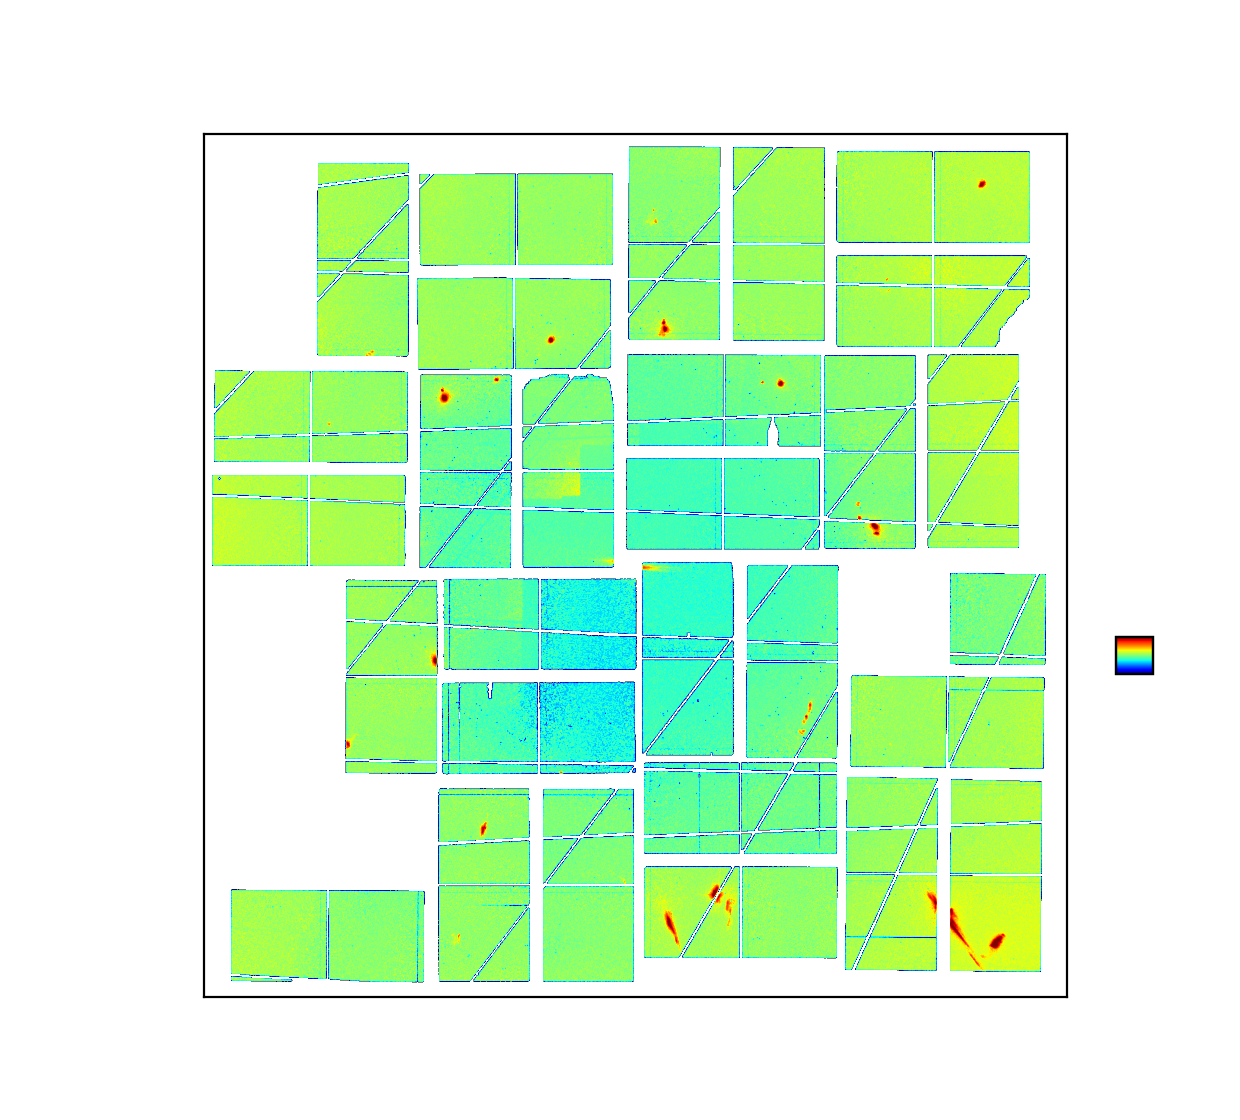

In [289]:
f = h5py.File('/Users/niloo/Desktop/LCLS/CXI/cxi25410/res/iceFinderCampaign/output_r0144/type1/LCLS_2011_Feb28_r0144_163320_1409a_cspad.h5', 'r')
d = f['data/data'][:]
fig = figure(figsize=(6.2,5.6))
ax = fig.gca()
plt.gca().invert_yaxis()

axcolor = fig.add_axes([0.90, 0.02, 0.03, 0.79])
d_ma[np.where(d_ma <= 0.1)] = 0.1
d_ma[np.where(d_ma >= 5000)] = 5000
cmap = copy.copy(mpl.cm.get_cmap("jet"))
#cmap.set_bad('grey',1.)
cmap.set_bad('white',1.)
cmap.set_under('blue')
#cmap.set_under('white',1.)
#im = ax.imshow(d_ma, origin='lower', cmap=cmap, norm=LogNorm(vmin=0.1, vmax=5000))
im = ax.imshow(d_ma, origin='lower', cmap=cmap, norm=LogNorm(vmin=0.1, vmax=5000))
ax.tick_params(axis='both',
               which='both',
               bottom='off',
               left='off',
               labelbottom='off',
               labelleft='off')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#t = [0.01, 0.1, 1.0, 10, 100, 1000, 5000]
fig.colorbar(im, cax=axcolor, format='$%.2f$')
im.cmap.set_under('grey',1.)
plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/LCLS_files/LCLS_plots/example.eps', format='eps')

plt.show()


<IPython.core.display.Javascript object>


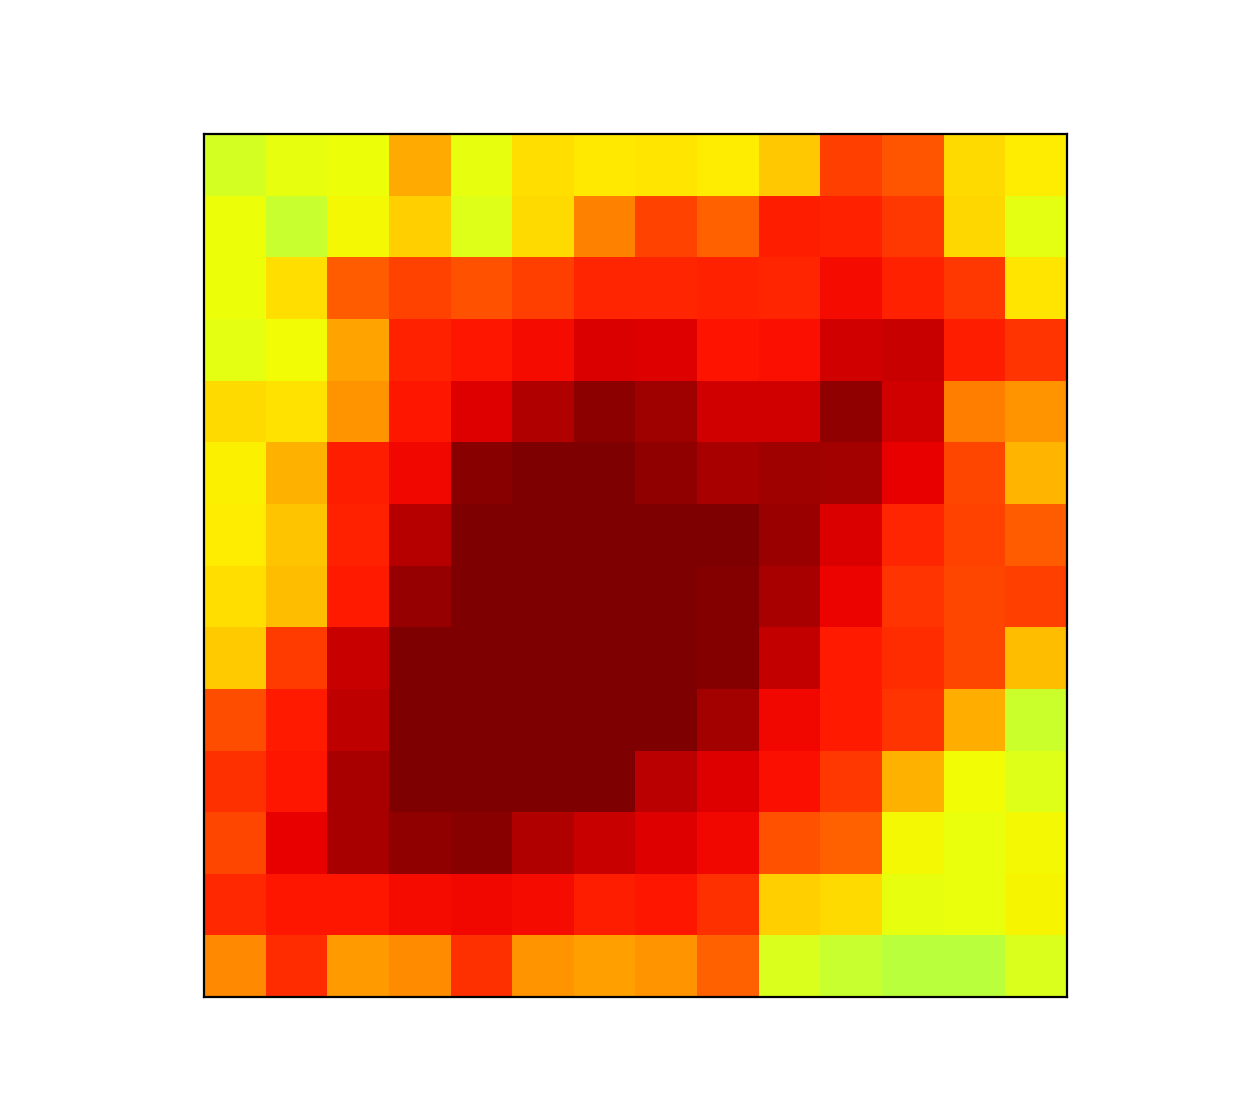

In [324]:
n=13
p_test = specific_shots('r0144','LCLS_2011_Feb28_r0144_163320_1409a_cspad')['peaks'][n]
fig = figure(figsize=(6.2,5.6))
ax = fig.gca()
plt.gca().invert_yaxis()

d_ma[np.where(d_ma <= 0.1)] = 0.1
d_ma[np.where(d_ma >= 5000)] = 5000
cmap = copy.copy(mpl.cm.get_cmap("jet"))
#cmap.set_bad('grey',1.)
cmap.set_bad('white',1.)
cmap.set_under('blue')
#cmap.set_under('white',1.)
#im = ax.imshow(d_ma, origin='lower', cmap=cmap, norm=LogNorm(vmin=0.1, vmax=5000))
im = ax.imshow(p_test, origin='lower', cmap=cmap, norm=LogNorm(vmin=0.1, vmax=5000))
ax.tick_params(axis='both',
               which='both',
               bottom='off',
               left='off',
               labelbottom='off',
               labelleft='off')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#t = [0.01, 0.1, 1.0, 10, 100, 1000, 5000]
#fig.colorbar(im, cax=axcolor, format='$%.2f$')
im.cmap.set_under('grey',1.)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#cax1 = divider1.append_axes('right', size='5%', pad=0.05)

plt.savefig('/Users/niloo/Desktop/LCLS/LCLS_2011_Feb28_r0144_163320_1409a_cspad_%d.eps'%n, format='eps', bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


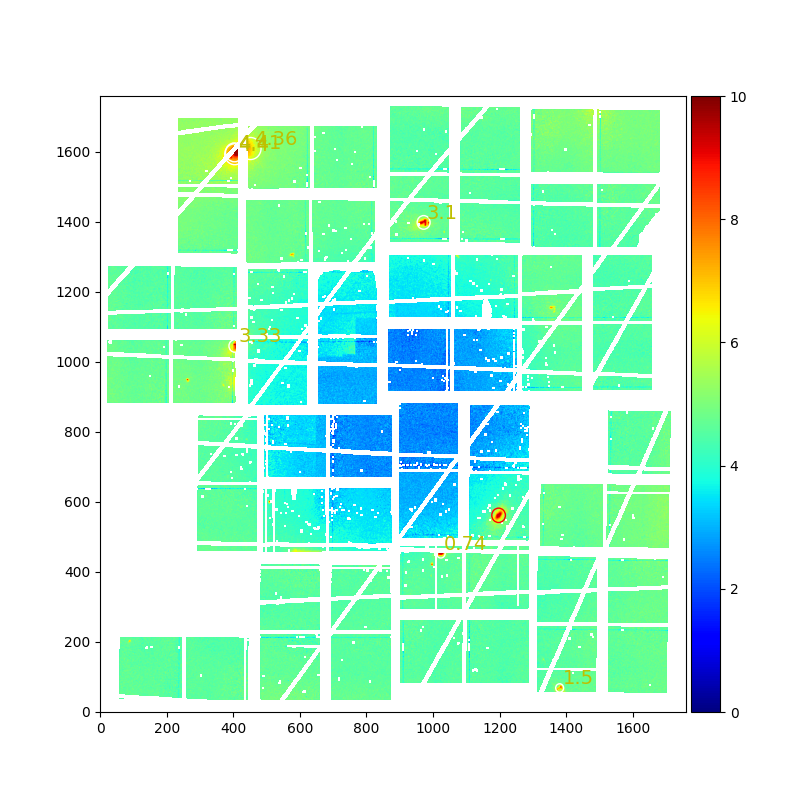

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log


In [167]:
shot = 'LCLS_2011_Feb28_r0151_182539_45ff_cspad'
run = 'r0151'
peak_ref = 2
f = h5py.File('/Users/niloo/Desktop/LCLS/14Dec2020/LCLS_files/LCLS_plots/4.35-4.45/%s.h5'%shot, 'r')
d = f['data/data'][:]
f.close()
peak_0 = specific_shots(run, shot)['peaks']
center_0 = specific_shots(run, shot)['center_mass']
center_0 = list(map(tuple, center_0))
r0 = specific_shots(run, shot)['radiusInPixels']
distances = specific_shots(run, shot)['distances']
fig = plt.figure(figsize=[8,8])
ax = fig.gca()

circle1 = plt.Circle((center_0[peak_ref][0],center_0[peak_ref][1]), radius=r0[peak_ref], color='r')
circle1.set_fill(False)
ax.add_patch(circle1)
Center = [ele for ele in center_0 if ele!=center_0[peak_ref]]
Radius = [ele for ele in r0 if ele!=r0[peak_ref]]


for peak in range(len(Radius)):
        circle2 = plt.Circle((Center[peak][0],Center[peak][1]), radius=Radius[peak], color='w')
        circle2.set_fill(False)
        ax.add_patch(circle2)
        try:
            ax.text(Center[peak][0]+10, Center[peak][1]+10, round(distances[peak_ref][peak],2), color = 'y', fontsize = 14)
        except:
            pass

im = ax.imshow(np.log(d),cmap='jet', origin = 'lower', aspect='auto', vmin=0, vmax=10)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/LCLS_files/LCLS_plots/4.35-4.45/%s_log.eps'%shot, format='eps')
plt.show()

<IPython.core.display.Javascript object>


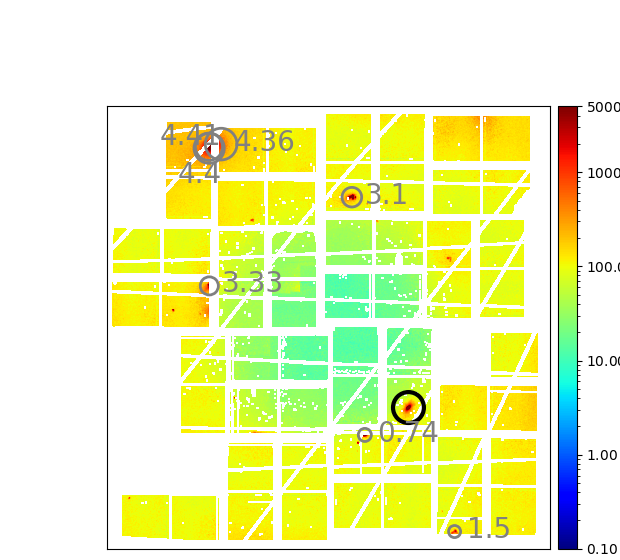

In [168]:
import copy
from pylab import figure, cm
from matplotlib.colors import LogNorm
# C = some matrix
f = figure(figsize=(6.2,5.6))
ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
circle1 = plt.Circle((center_0[peak_ref][0],center_0[peak_ref][1]), radius=3*r0[peak_ref], color='k', lw=3)
circle1.set_fill(False)
ax.add_patch(circle1)
Center = [ele for ele in center_0 if ele!=center_0[peak_ref]]
Radius = [ele for ele in r0 if ele!=r0[peak_ref]]

cpx = []
cpy = []
cpt = 100
texts = []
for peak in range(len(Radius)):
        circle2 = plt.Circle((Center[peak][0],Center[peak][1]), radius=2*Radius[peak], color='gray', lw=2)
        circle2.set_fill(False)
        ax.add_patch(circle2)
        try:
            px = Center[peak][0]+50
            py = Center[peak][1]-50
            #print((px - np.array(cpx))**2 + (py - np.array(cpy))**2)
            #if (np.sum(((px - np.array(cpx))**2 + (py - np.array(cpy))**2) < cpt) > 0):
                #px += 50
                #py -= 100
            text = ax.text(px, py, round(distances[peak_ref][peak],2), color = 'gray', fontsize = 20)
            texts.append(text)
            cpx.append(Center[peak][0]+50)
            cpy.append(Center[peak][1]-50)
        except:
            pass

axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
d_ma = np.ma.masked_where(d==0, d)
cmap = copy.copy(mpl.cm.get_cmap("jet"))
cmap.set_bad('white',6000)
#cmap.set_under('white',1.)
#im = ax.imshow(d_ma, origin='lower', cmap=cmap, norm=LogNorm(vmin=0.1, vmax=5000))
im = ax.imshow(d_ma, origin='lower', cmap=cmap, norm=LogNorm(vmin=0.1, vmax=5000))
ax.tick_params(axis='both',
               which='both',
               bottom='off',
               left='off',
               labelbottom='off',
               labelleft='off')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
t = [0.01, 0.1, 1.0, 10, 100, 1000, 5000]
f.colorbar(im, cax=axcolor, ticks=t, format='$%.2f$')
im.cmap.set_under('grey',1.)
adjust_text(texts, only_move={'points':'y', 'texts':'y'})
plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/LCLS_files/LCLS_plots/d[3.2-3.5]/%s_log_range_colorbar.eps'%shot, format='eps', bbox_inches='tight')
#plt.tight_layout()
f.show()

<IPython.core.display.Javascript object>


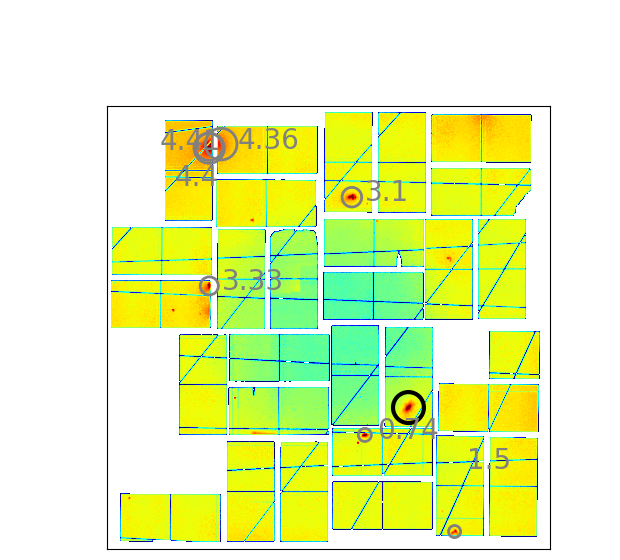

In [170]:
import copy
from pylab import figure, cm
from matplotlib.colors import LogNorm
# C = some matrix
f = figure(figsize=(6.2,5.6))
ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
circle1 = plt.Circle((center_0[peak_ref][0],center_0[peak_ref][1]), radius=3*r0[peak_ref], color='k', lw=3)
circle1.set_fill(False)
ax.add_patch(circle1)
Center = [ele for ele in center_0 if ele!=center_0[peak_ref]]
Radius = [ele for ele in r0 if ele!=r0[peak_ref]]

cpx = []
cpy = []
cpt = 100
texts = []
for peak in range(len(Radius)):
        circle2 = plt.Circle((Center[peak][0],Center[peak][1]), radius=2*Radius[peak], color='gray', lw=2)
        circle2.set_fill(False)
        ax.add_patch(circle2)
        try:
            px = Center[peak][0]+50
            py = Center[peak][1]-50
            #print((px - np.array(cpx))**2 + (py - np.array(cpy))**2)
            #if (np.sum(((px - np.array(cpx))**2 + (py - np.array(cpy))**2) < cpt) > 0):
                #px += 50
                #py -= 100
            text = ax.text(px, py, round(distances[peak_ref][peak],2), color = 'gray', fontsize = 20)
            texts.append(text)
            cpx.append(Center[peak][0]+50)
            cpy.append(Center[peak][1]-50)
        except:
            pass

#axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
d_ma = np.ma.masked_where(d==0, d)
cmap = copy.copy(mpl.cm.get_cmap("jet"))
d_ma[np.where(d_ma <= 0.1)] = 0.1
d_ma[np.where(d_ma >= 5000)] = 5000
#cmap.set_bad('grey',1.)
cmap.set_bad('white',1.)
#cmap.set_under('white',1.)
#im = ax.imshow(d_ma, origin='lower', cmap=cmap, norm=LogNorm(vmin=0.1, vmax=5000))
im = ax.imshow(d_ma, origin='lower', cmap=cmap, norm=LogNorm(vmin=0.1, vmax=5000))
ax.tick_params(axis='both',
               which='both',
               bottom='off',
               left='off',
               labelbottom='off',
               labelleft='off')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
t = [0.01, 0.1, 1.0, 10, 100, 1000, 5000]
#f.colorbar(im, cax=axcolor, ticks=t, format='$%.2f$')
adjust_text(texts, only_move={'points':'y', 'texts':'y'})
plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/LCLS_files/LCLS_plots/4.35-4.45/%s_log_range_colorbar.eps'%shot, format='eps', bbox_inches='tight')
#plt.tight_layout()
f.show()

<IPython.core.display.Javascript object>


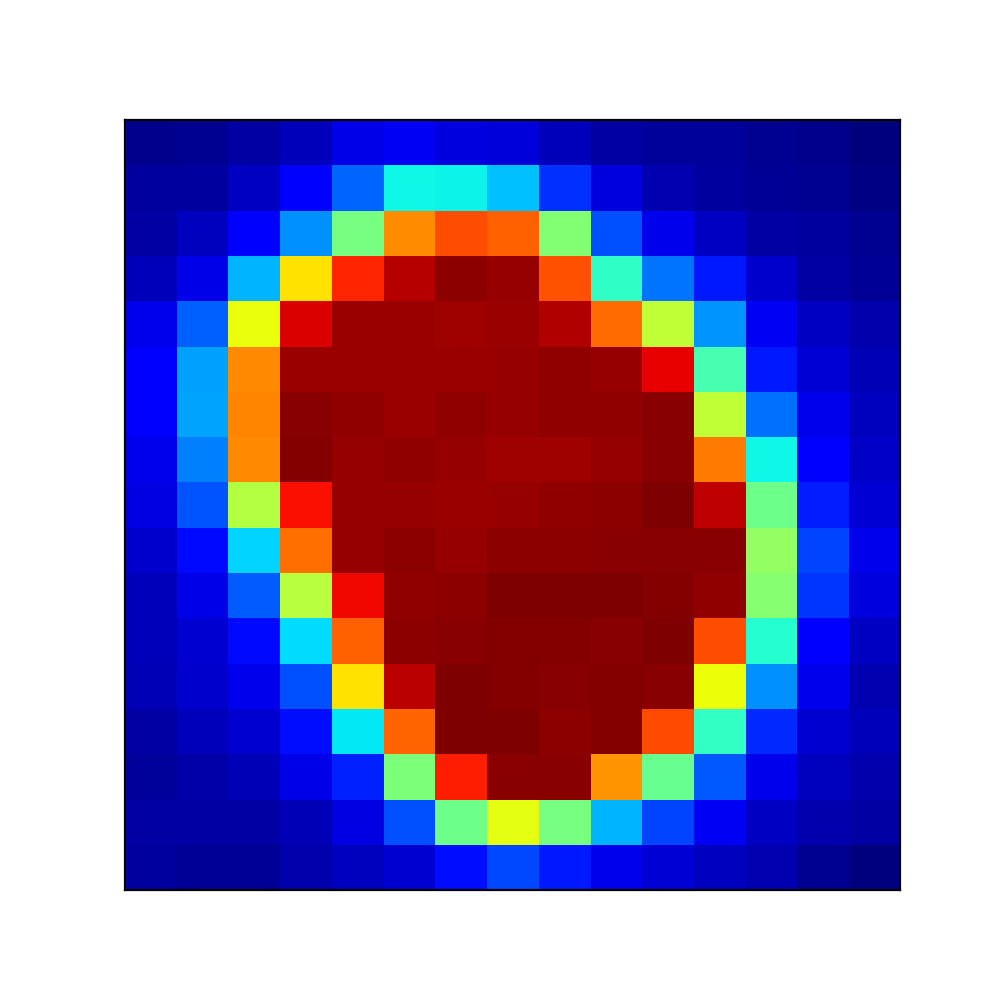

In [198]:
#single blob
#p_test = specific_shots('r0144','LCLS_2011_Feb28_r0144_163315_13941_cspad')['peaks'][0]
#p_test = specific_shots('r0144','LCLS_2011_Feb28_r0144_163339_15b07_cspad')['peaks'][9]
#p_test = specific_shots('r0147','LCLS_2011_Feb28_r0147_175400_1d751_cspad')['peaks'][0]
#p_test = specific_shots('r0168','LCLS_2011_Mar01_r0168_010117_b469_cspad')['peaks'][1]
#p_test = specific_shots('r0168','LCLS_2011_Mar01_r0168_004804_589b_cspad')['peaks'][0]
#p_test = specific_shots('r0166','LCLS_2011_Feb28_r0166_235723_1a469_cspad')['peaks'][0]
#p_test = specific_shots('r0165','LCLS_2011_Feb28_r0165_233248_1894e_cspad')['peaks'][1]
#p_test = specific_shots('r0151','LCLS_2011_Feb28_r0151_182429_1e297_cspad')['peaks'][10]
p_test = specific_shots('r0151','LCLS_2011_Feb28_r0151_182215_12738_cspad')['peaks'][2]


shot = 'LCLS_2011_Feb28_r0151_182215_12738_cspad'

blur = skimage.filters.gaussian(p_test, sigma=1)
t = skimage.filters.threshold_otsu(blur)
mask = blur > t
fill_holes = binary_fill_holes(mask)
labeled_image, number_of_peaks = scipy.ndimage.label(fill_holes.astype(np.float32))
peak_regions = scipy.ndimage.find_objects(labeled_image)
#p = fill_holes[peak_regions[0]]
fig = plt.figure(figsize = [5,5])
ax = fig.gca()

im1 = ax.imshow(p_test,cmap='jet', origin = 'lower', aspect='auto')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
divider1 = make_axes_locatable(ax)
#cax1 = divider1.append_axes('right', size='5%', pad=0.05)
#fig.colorbar(im1, cax=cax1, orientation='vertical')
plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/LCLS_files/LCLS_plots/Fig6/%s_cutout.eps'%shot, format='eps', bbox_inches='tight')
#plt.clim(vmin=0,vmax=400)
plt.show()

<IPython.core.display.Javascript object>


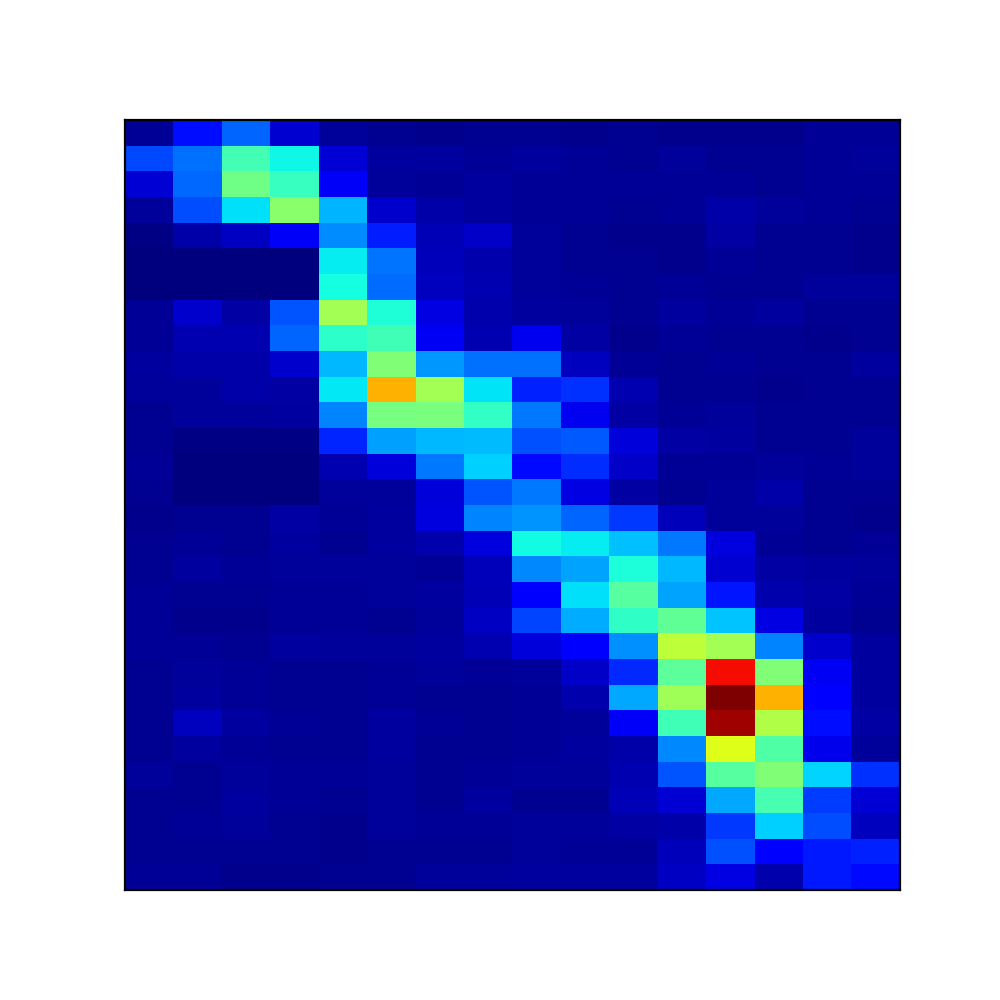

In [212]:
#streak peaks
#p_test = specific_shots('r0144','LCLS_2011_Feb28_r0144_163533_1fb33_cspad')['peaks'][5]
#p_test = specific_shots('r0144','LCLS_2011_Feb28_r0144_163259_12384_cspad')['peaks'][6]
#p_test = specific_shots('r0147','LCLS_2011_Feb28_r0147_174918_4ac4_cspad')['peaks'][14]
#p_test = specific_shots('r0167','LCLS_2011_Mar01_r0167_003043_a155_cspad')['peaks'][11]
#p_test = specific_shots('r0168','LCLS_2011_Mar01_r0168_010507_1f848_cspad')['peaks'][3]
#p_test = specific_shots('r0168','LCLS_2011_Mar01_r0168_005054_14784_cspad')['peaks'][0]
#p_test = specific_shots('r0166','LCLS_2011_Feb28_r0166_235228_4b0_cspad')['peaks'][1]
#p_test = specific_shots('r0166','LCLS_2011_Feb28_r0166_234223_b127_cspad')['peaks'][4]
#p_test = specific_shots('r0168','LCLS_2011_Mar01_r0168_004556_1a517_cspad')['peaks'][12]
p_test = specific_shots('r0169','LCLS_2011_Mar01_r0169_014005_17df3_cspad')['peaks'][4]


shot = 'LCLS_2011_Mar01_r0169_014005_17df3_cspad'

blur = skimage.filters.gaussian(p_test, sigma=1)
t = skimage.filters.threshold_otsu(blur)
mask = blur > t
fill_holes = binary_fill_holes(mask)
labeled_image, number_of_peaks = scipy.ndimage.label(fill_holes.astype(np.float32))
peak_regions = scipy.ndimage.find_objects(labeled_image)
#p = fill_holes[peak_regions[0]]
fig = plt.figure(figsize = [5,5])
ax = fig.gca()

im1 = ax.imshow(p_test,cmap='jet', origin = 'lower', aspect='auto')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
divider1 = make_axes_locatable(ax)
#cax1 = divider1.append_axes('right', size='5%', pad=0.05)
#fig.colorbar(im1, cax=cax1, orientation='vertical')
#plt.clim(vmin=0,vmax=400)
plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/LCLS_files/LCLS_plots/Fig6/%s_cutout.eps'%shot, format='eps', bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


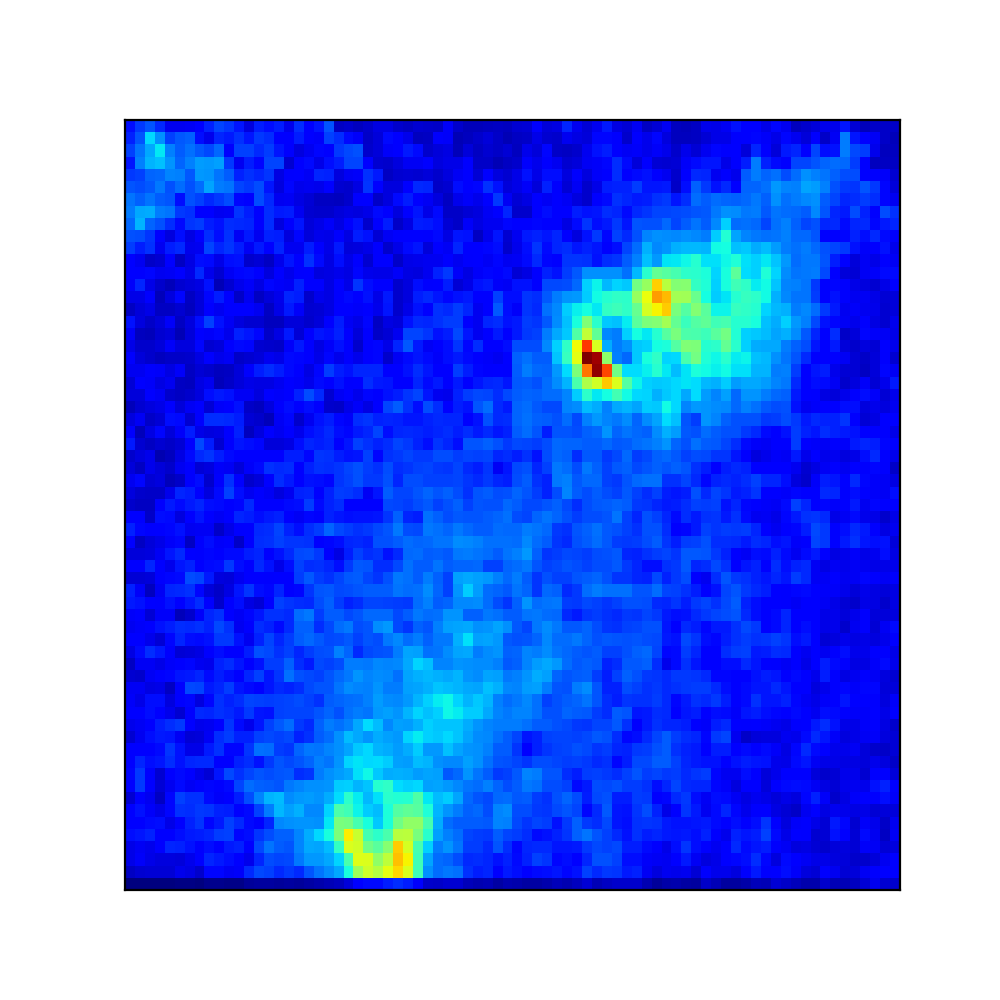

In [222]:
#structured peaks

#p_test = specific_shots('r0145','LCLS_2011_Feb28_r0145_165006_c669_cspad')['peaks'][1]
#p_test = specific_shots('r0145','LCLS_2011_Feb28_r0145_165411_201c_cspad')['peaks'][7]
#p_test = specific_shots('r0144','LCLS_2011_Feb28_r0144_163533_1fb33_cspad')['peaks'][4]
#p_test = specific_shots('r0144','LCLS_2011_Feb28_r0144_163613_347d_cspad')['peaks'][3]
#p_test = specific_shots('r0145','LCLS_2011_Feb28_r0145_164724_1e2d0_cspad')['peaks'][0]
#p_test = specific_shots('r0167','LCLS_2011_Mar01_r0167_004307_b75d_cspad')['peaks'][1]
#p_test = specific_shots('r0167','LCLS_2011_Mar01_r0167_001730_45a5_cspad')['peaks'][3]
#p_test = specific_shots('r0167','LCLS_2011_Mar01_r0167_002854_7aa_cspad')['peaks'][0]
p_test = specific_shots('r0165','LCLS_2011_Feb28_r0165_232454_edf9_cspad')['peaks'][2]

blur = skimage.filters.gaussian(p_test, sigma=1)
t = skimage.filters.threshold_otsu(blur)
mask = blur > t
fill_holes = binary_fill_holes(mask)
labeled_image, number_of_peaks = scipy.ndimage.label(fill_holes.astype(np.float32))
peak_regions = scipy.ndimage.find_objects(labeled_image)
#p = fill_holes[peak_regions[0]]

shot = 'LCLS_2011_Feb28_r0165_232454_edf9_cspad'

fig = plt.figure(figsize = [5,5])
ax = fig.gca()

im1 = ax.imshow(p_test,cmap='jet', origin = 'lower', aspect='auto')

divider1 = make_axes_locatable(ax)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#cax1 = divider1.append_axes('right', size='5%', pad=0.05)
#fig.colorbar(im1, cax=cax1, orientation='vertical')
#plt.clim(vmin=0,vmax=400)
plt.savefig('/Users/niloo/Desktop/LCLS/14Dec2020/LCLS_files/LCLS_plots/Fig6/%s_cutout.eps'%shot, format='eps', bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


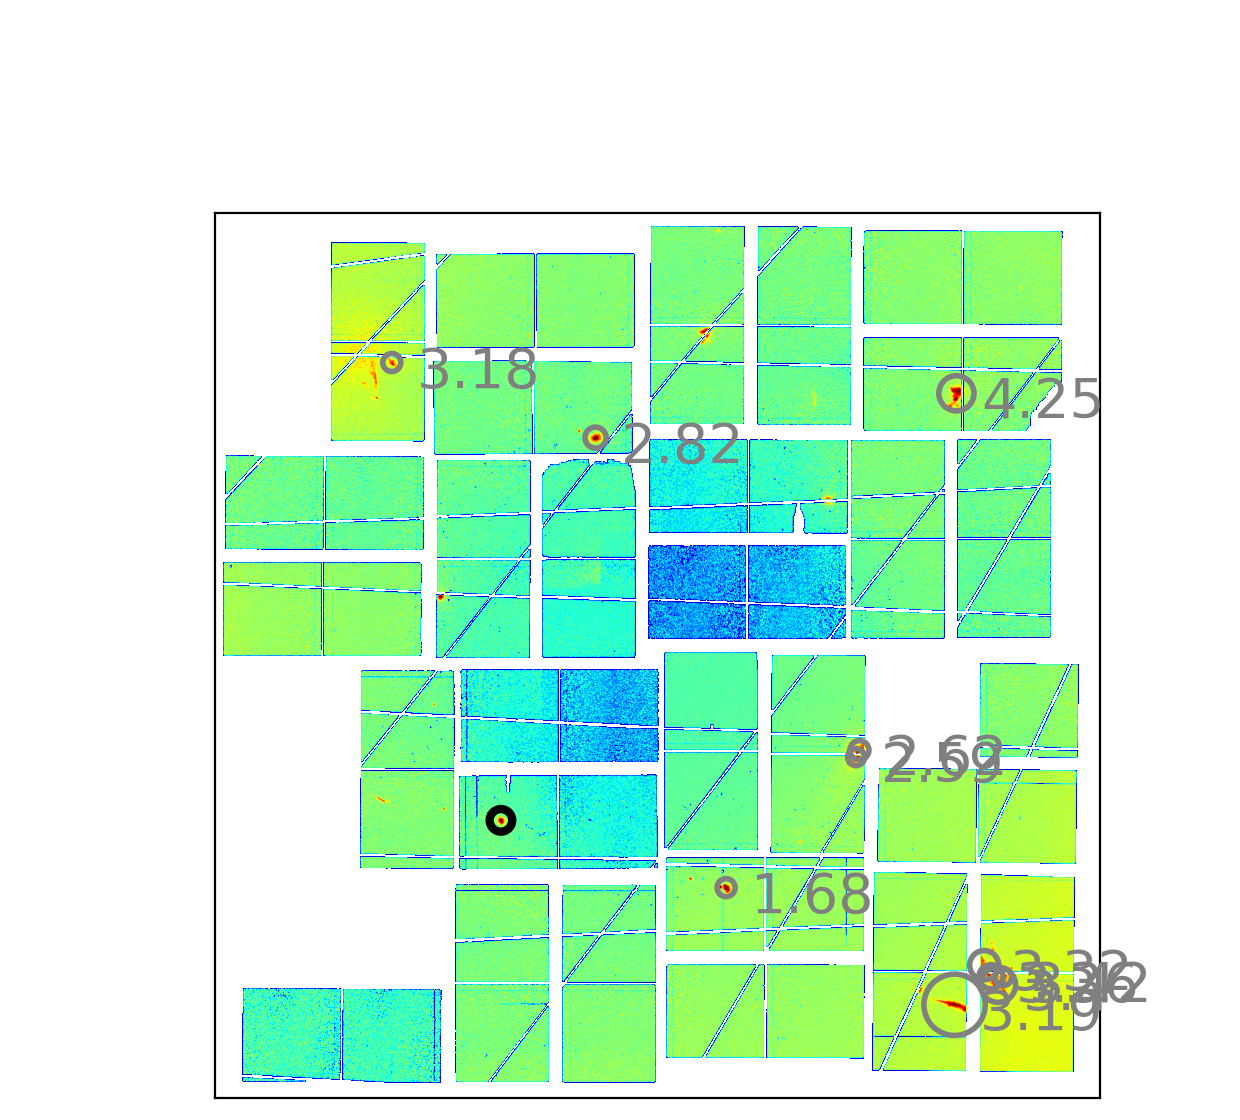

In [85]:
import copy
from pylab import figure, cm
from matplotlib.colors import LogNorm
# C = some matrix
f = figure(figsize=(6.2,5.6))
ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
circle1 = plt.Circle((center_0[peak_ref][0],center_0[peak_ref][1]), radius=3*r0[peak_ref], color='k', lw=3)
circle1.set_fill(False)
ax.add_patch(circle1)
Center = [ele for ele in center_0 if ele!=center_0[peak_ref]]
Radius = [ele for ele in r0 if ele!=r0[peak_ref]]

cpx = []
cpy = []
cpt = 100
for peak in range(len(Radius)):
        circle2 = plt.Circle((Center[peak][0],Center[peak][1]), radius=2*Radius[peak], color='gray', lw=2)
        circle2.set_fill(False)
        ax.add_patch(circle2)
        try:
            px = Center[peak][0]+50
            py = Center[peak][1]-50
            #print((px - np.array(cpx))**2 + (py - np.array(cpy))**2)
            #if (np.sum(((px - np.array(cpx))**2 + (py - np.array(cpy))**2) < cpt) > 0):
            #    px += 50
            #    py -= 100
            ax.text(px, py, round(distances[peak_ref][peak],2), color = 'gray', fontsize = 20)
            cpx.append(Center[peak][0]+50)
            cpy.append(Center[peak][1]-50)
        except:
            pass

#axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])
d_ma = np.ma.masked_where(d==0, d)
d_ma[np.where(d_ma <= 0.1)] = 0.1
d_ma[np.where(d_ma >= 5000)] = 5000
cmap = copy.copy(mpl.cm.get_cmap("jet"))
#cmap.set_bad('grey',1.)
cmap.set_bad('white',1.)
cmap.set_under('blue')
#cmap.set_under('white',1.)
im = ax.imshow(d_ma, origin='lower', cmap=cmap, norm=LogNorm(vmin=0.1, vmax=5000))
ax.tick_params(axis='both',
               which='both',
               bottom='off',
               left='off',
               labelbottom='off',
               labelleft='off')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
t = [0.01, 0.1, 1.0, 10, 100, 1000, 5000]
#f.colorbar(im, cax=axcolor, ticks=t, format='$%.2f$')
adjust_text(texts, only_move={'points':'y', 'texts':'y'})
#plt.tight_layout()
f.show()